<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-your-TensorFlow-version" data-toc-modified-id="Check-your-TensorFlow-version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check your TensorFlow version</a></span></li><li><span><a href="#Select-a-dataset-to-train-on" data-toc-modified-id="Select-a-dataset-to-train-on-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Select a dataset to train on</a></span></li><li><span><a href="#Building-a-train-and-a-test-dataset" data-toc-modified-id="Building-a-train-and-a-test-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a train and a test dataset</a></span></li><li><span><a href="#Building-the-Perceptron-model" data-toc-modified-id="Building-the-Perceptron-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building the Perceptron model</a></span></li><li><span><a href="#Training-the-Perceptron" data-toc-modified-id="Training-the-Perceptron-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training the Perceptron</a></span></li><li><span><a href="#Testing-the-Perceptron" data-toc-modified-id="Testing-the-Perceptron-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Testing the Perceptron</a></span></li></ul></div>

This notebook is inspired by:

https://towardsdatascience.com/building-your-first-neural-network-in-tensorflow-2-tensorflow-for-hackers-part-i-e1e2f1dfe7a0

# Check your TensorFlow version

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


# Select a dataset to train on

We will use the Fashion MNIST dataset.

See https://github.com/zalandoresearch/fashion-mnist

In [3]:
from tensorflow import keras

(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_val.shape

(10000, 28, 28)

In [8]:
y_val.shape

(10000,)

In [9]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
y_train[0]

9

In [11]:
y_train.dtype

dtype('uint8')

There are 10 different classes of cloths in the Fashion MNIST dataset:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Let us display some example images:

In [12]:
import matplotlib.pyplot as plt

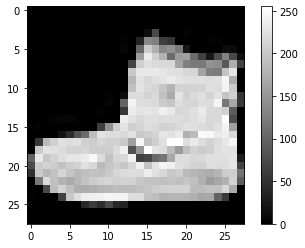

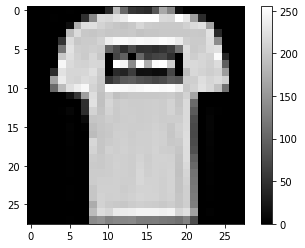

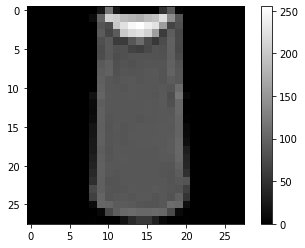

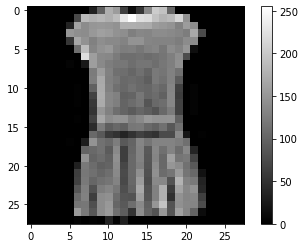

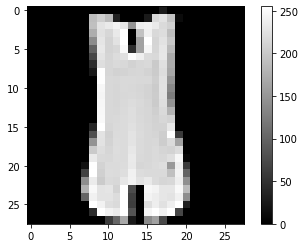

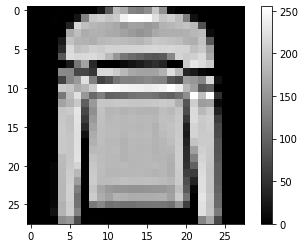

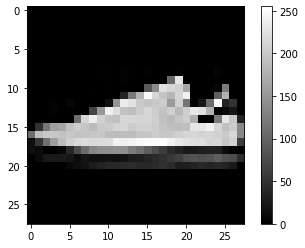

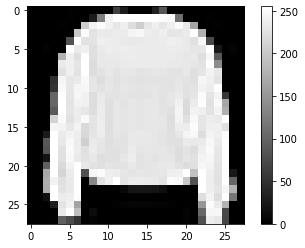

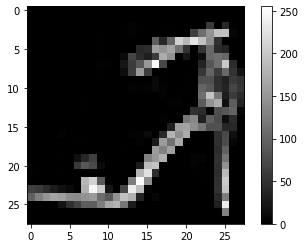

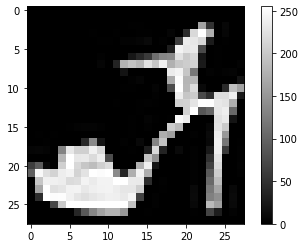

In [13]:
for i in range(0,10):
    plt.imshow(x_train[i], cmap="gray")
    plt.colorbar()
    plt.show()

# Building a train and a test dataset

In [14]:
def preprocess(x, y):
  """
  Preprocess one training sample (x,y)
  where x is the input
  and y is the output
  
  The input data will be converted to float
  data and scaled to [0,1]
  
  The output data will be converted to int
  data in order to map it to one-hot encoded
  vectors later
  """
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y


def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

What does `tf.one_hot` do?

In [15]:
tf.one_hot( [1, 2, 3, 1], depth=6 )

<tf.Tensor: id=4, shape=(4, 6), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [16]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

In [17]:
train_dataset

<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>

In [18]:
val_dataset

<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>

In [19]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [20]:
type(val_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

# Building the Perceptron model

In [21]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=10, activation='linear')
])

# Training the Perceptron

In [22]:
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

Train for 500 steps, validate for 2 steps
Epoch 1/10
500/500 [==============================] - 5s 10ms/step - loss: 0.1104 - accuracy: 0.4257 - val_loss: 0.0870 - val_accuracy: 0.5195
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0792 - accuracy: 0.6034 - val_loss: 0.0746 - val_accuracy: 0.6562
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0701 - accuracy: 0.6556 - val_loss: 0.0676 - val_accuracy: 0.6602
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0649 - accuracy: 0.6901 - val_loss: 0.0562 - val_accuracy: 0.7812
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0612 - accuracy: 0.7102 - val_loss: 0.0586 - val_accuracy: 0.7266
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0584 - accuracy: 0.7289 - val_loss: 0.0578 - val_accuracy: 0.7422
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0563 - accuracy: 0.7404 - val

# Testing the Perceptron

Get a sample image from the validation dataset:

In [45]:
sample_x = x_val[0]

In [46]:
sample_x.shape

(28, 28)

In [47]:
type(sample_x)

numpy.ndarray

In [48]:
sample_x.dtype

dtype('uint8')

In [49]:
sample_x = sample_x.astype('float32') 

In [50]:
sample_x.dtype

dtype('float32')

In [59]:
# first try the code with this line,
# then comment this line, i.e.
# do no rescaling of the input data
# and observe how the predicted values
# become much larger!
sample_x = sample_x / 255.0

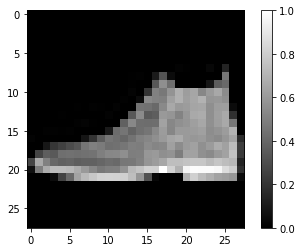

In [52]:
plt.imshow(sample_x, cmap="gray")
plt.colorbar()
plt.show()

In [53]:
sample_y = y_val[0]

In [54]:
sample_y

9

In [55]:
# Model expects input to have 3D shape (sample-nr, x, y)
sample_x_reshaped = sample_x.reshape(-1, sample_x.shape[0], sample_x.shape[1])
preds = model.predict( sample_x_reshaped)

In [56]:
preds

array([[-0.16528496, -0.05652507,  0.17387627,  0.13814482, -0.05952141,
         0.23525172,  0.04190741,  0.21741596,  0.13999702,  0.50196356]],
      dtype=float32)

In [57]:
import numpy as np
predicted_label = np.argmax(preds)

In [58]:
predicted_label

9